In [3]:
from src import profile_aaron, util

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

from collections import Counter, defaultdict
import os
import json
from pprint import pprint

In [4]:
try:
    __IPYTHON__
    from tqdm.notebook import tqdm
except NameError:
    from tqdm import tqdm

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
data_dir = "data"
dmrs_dir =  os.path.join(data_dir, "preprocessed_dmrs")
profile_dir = os.path.join(dmrs_dir, "info")

## compute predarg2cnt

In [10]:
log_dir = "saved/log/TCS/0807_035317"
predarg2cnt_file_path = os.path.join(log_dir, "predarg2cnt.txt")

predarg2cnt = Counter()
with open(predarg2cnt_file_path) as f:
    line = f.readline()
    while line:
        predarg, cnt = line.strip().split("\t")
        predarg2cnt[predarg] = int(cnt)
        line = f.readline()

In [13]:
min_freqs = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for min_freq in min_freqs:
    preds, num_predarg = set(), None
    for idx, (predarg, cnt) in enumerate(predarg2cnt.most_common()):
        preds.add(predarg.split("@")[0])
        if cnt < min_freq:
            num_predarg = idx
            break
    print (min_freq, '\t', len(preds), num_predarg, len(preds)/num_predarg)



100 	 42513 64159
200 	 30695 47709
300 	 25629 40283
400 	 22599 35732
500 	 20514 32591
600 	 18898 30117
700 	 17660 28201
800 	 16571 26481
900 	 15747 25159
1000 	 15001 23970


## compute pred2cnt

In [14]:
profile_aaron.main(dmrs_dir, profile_dir)

  0%|          | 0/24499 [00:00<?, ?it/s]

In [31]:
pred2cnt = Counter()
pred2logCnt = defaultdict(float)
pred2cnt_path = os.path.join(profile_dir, "pred2cnt_27072022.txt")
with open(pred2cnt_path, "r", encoding = 'utf-8') as f:
    line = f.readline()
    while line:
        pred, freq = line.split("\t")
        pred2cnt[pred] = int(freq)
        pred2logCnt[pred] = math.log(int(freq), 2)
        line = f.readline()
freqs = list(pred2cnt.values())
log_freqs = list(pred2logCnt.values())

min_freq2num_dmrs = Counter()
min_freq2num_dmrs_filename = "min_freq2num_dmrs.txt"
min_freq2num_dmrs_path = os.path.join(profile_dir, min_freq2num_dmrs_filename)
with open(min_freq2num_dmrs_path) as f:
    line = f.readline()
    while line:
        min_freq, num_dmrs = line.strip().split("\t")
        min_freq2num_dmrs[int(min_freq)] = int(num_dmrs)
        line = f.readline()

stats = defaultdict()
stats_filename = "stats.txt"
stats_path = os.path.join(profile_dir, stats_filename)
with open(stats_path) as f:
    line = f.readline()
    while line:
        key, value = line.strip().split("\t")
        stats[key] = int(value)
        line = f.readline()



In [23]:
for k,v in min_freq2num_dmrs.most_common():
    print (k, v)

13775489 2049575
1 893996
2 415166
3 277346
4 212497
441283 189774
5 172785
6 151281
4528474 144111
7 130248
8 116293
9 105877
2844553 103136
10 96938
11 88287
12 81428
9152535 80521
1263903 77460
13 76467
14 71706
152274 67086
15 66485
16 63207
17 60273
18 58000
637230 57894
58096 55173
19 53142
20 51055
2083327 51016
288861 51014
21 50028
63757 48116
22 47256
126333 46776
24 45035
23 44888
420680 44581
25 41895
66339 41822
63838 41603
26 41594
50218 41329
27 40190
29 39763
9313661 39573
28 39205
46330 38238
30 38136
52538 37476
150706 37243
168855 37204
41596 37204
31 36101
38561 35805
32 35551
93147 35292
34 34504
33 34235
248948 33088
35 32953
36 32890
94705 32367
1069271 31838
37 30658
39 29878
38 29656
41 29137
301643 29098
42 28747
1221544 28745
40 28450
44 28076
45 27823
77709 27420
46 27246
43 27224
47 27005
95177 26575
65518 26506
48 26323
51 26259
49 25987
166449 25953
52 24925
568625 24907
9906106 24825
50 24614
54 24260
25272 24102
55 23905
108648 23670
56 23513
210920 232

In [22]:
# season_rel

# eventuality_rel
# nominalization
# named_rel

## dummy_rel
# generic_entity_rel
# pron
# thing_rel
# person_rel
# place_n_rel
# time_n_rel
# reason_rel

## numbers
# card_rel
# yofc_rel
# mofy_rel
# ord_rel
# dofm_rel
# year_range_rel




# number_q_rel

# ?
# compound_rel
# compound_name_rel
# named_n_rel (1212 has named_a, named_n)
# of_p_rel

# comp_rel
# superl_rel
# comp_equal_rel


# logical
# neg_rel



# interval_rel 1233006
# interval_p_start_rel 1222106
# interval_p_end_rel 1222106

# much-many_a_rel (how much/many)
# little-few_a_rel

# which_q_rel (whose book)
# with_p_rel (Instrumental Relatives, e.g., The plumber to fix the sink is coming at 10.)

# plus_rel (add)
# times_rel (multiply)

# Free Relatives: ‘free_relative_q’, ‘free_relative_ever_q’ (whoever, whichever)

# relative_mod
# appos

# subord_rel


In [24]:
for k,v in pred2cnt.most_common():
    if not k.startswith("_") and not k.startswith("u_") and 'q' in k:
        print (k, v)
    

udef_q_rel 112612113
proper_q_rel 85765263
pronoun_q_rel 20056061
def_explicit_q_rel 12380972
number_q_rel 4528474
def_implicit_q_rel 2767197
fw_seq_rel 2083327
comp_equal_rel 542731
which_q_rel 462913
idiom_q_i_rel 442277
free_relative_q_rel 390642
every_q_rel 66086
free_relative_ever_q_rel 29577
num_seq_rel 26270
some_q_rel 129


In [25]:
for k,v in pred2cnt.most_common():
    if k.startswith("_") and '_q_' in k:
        print (k, v)

_the_q_rel 44967936
_a_q_rel 16028033
_this_q_dem 2111330
_some_q_rel 783228
_all_q_rel 733946
_that_q_dem 665754
_these_q_dem 586489
_no_q_rel 452068
_any_q_rel 405601
_most_q_rel 312292
_each_q_rel 277855
_another_q_rel 267246
_part_q_rel 236840
_those_q_dem 218709
_both_q_rel 218577
_every_q_rel 166028
_such_q_rel 124665
_which_q_rel 109481
_some_q_indiv 67839
_such+a_q_rel 45426
_half_q_rel 34706
_either_q_rel 33949
_enough_q_rel 22706
_the+most_q_rel 21881
_neither_q_rel 12796
_x_q_rel 6720
_twice_q_rel 5463
_a+little_q_rel 2066
_no+more_q_rel 2024
_the+least_q_rel 1794
_an+additional_q_rel 1695
_what+a_q_rel 1625
_a+bit_q_rel 1277
_many+a_q_rel 969
_any+more_q_rel 921
_each+and+every_q_rel 655
_certain_q_rel 279
_umpteen_q_rel 15
_q_a_colon 7


In [32]:
# No. of dmrs left when we keep only pred with #occurrence > n
dmrs_cnt_tmp = stats['dmrs_cnt']
no_dmrs_wo_rare_pred = Counter()
for i in range(0, 1000):
    dmrs_cnt_tmp -= min_freq2num_dmrs[i]
    no_dmrs_wo_rare_pred[i] = dmrs_cnt_tmp
    print ("#DMRSs Without {}-time pred: {}".format(i, dmrs_cnt_tmp))
    

#DMRSs Without 0-time pred: 43784012
#DMRSs Without 1-time pred: 42890016
#DMRSs Without 2-time pred: 42474850
#DMRSs Without 3-time pred: 42197504
#DMRSs Without 4-time pred: 41985007
#DMRSs Without 5-time pred: 41812222
#DMRSs Without 6-time pred: 41660941
#DMRSs Without 7-time pred: 41530693
#DMRSs Without 8-time pred: 41414400
#DMRSs Without 9-time pred: 41308523
#DMRSs Without 10-time pred: 41211585
#DMRSs Without 11-time pred: 41123298
#DMRSs Without 12-time pred: 41041870
#DMRSs Without 13-time pred: 40965403
#DMRSs Without 14-time pred: 40893697
#DMRSs Without 15-time pred: 40827212
#DMRSs Without 16-time pred: 40764005
#DMRSs Without 17-time pred: 40703732
#DMRSs Without 18-time pred: 40645732
#DMRSs Without 19-time pred: 40592590
#DMRSs Without 20-time pred: 40541535
#DMRSs Without 21-time pred: 40491507
#DMRSs Without 22-time pred: 40444251
#DMRSs Without 23-time pred: 40399363
#DMRSs Without 24-time pred: 40354328
#DMRSs Without 25-time pred: 40312433
#DMRSs Without 26-time

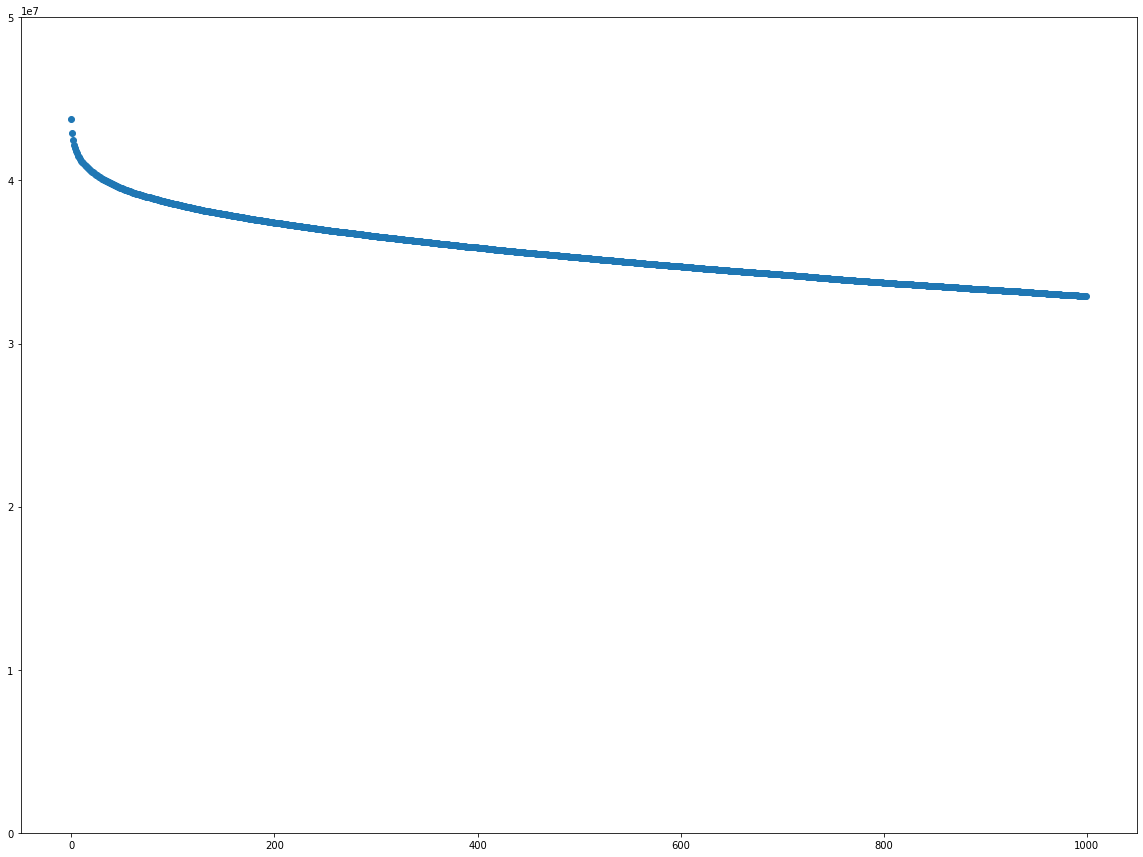

In [33]:
no_dmrs_wo_rare_pred_list = list(no_dmrs_wo_rare_pred.values())
plt.figure(figsize=(20,15))
plt.ylim(0, 5e7)
plt.scatter(range(len(no_dmrs_wo_rare_pred_list)), no_dmrs_wo_rare_pred_list)

## Plots

In [34]:
# Total no. of pred
print (len(pred2cnt))

1719927


## x: #occurrence; y: freq

(array([1.71314e+06, 2.30900e+03, 1.06400e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]),
 array([        1,      5001,     10001, ..., 112600001, 112605001,
        112610001]),
 <BarContainer object of 22522 artists>)

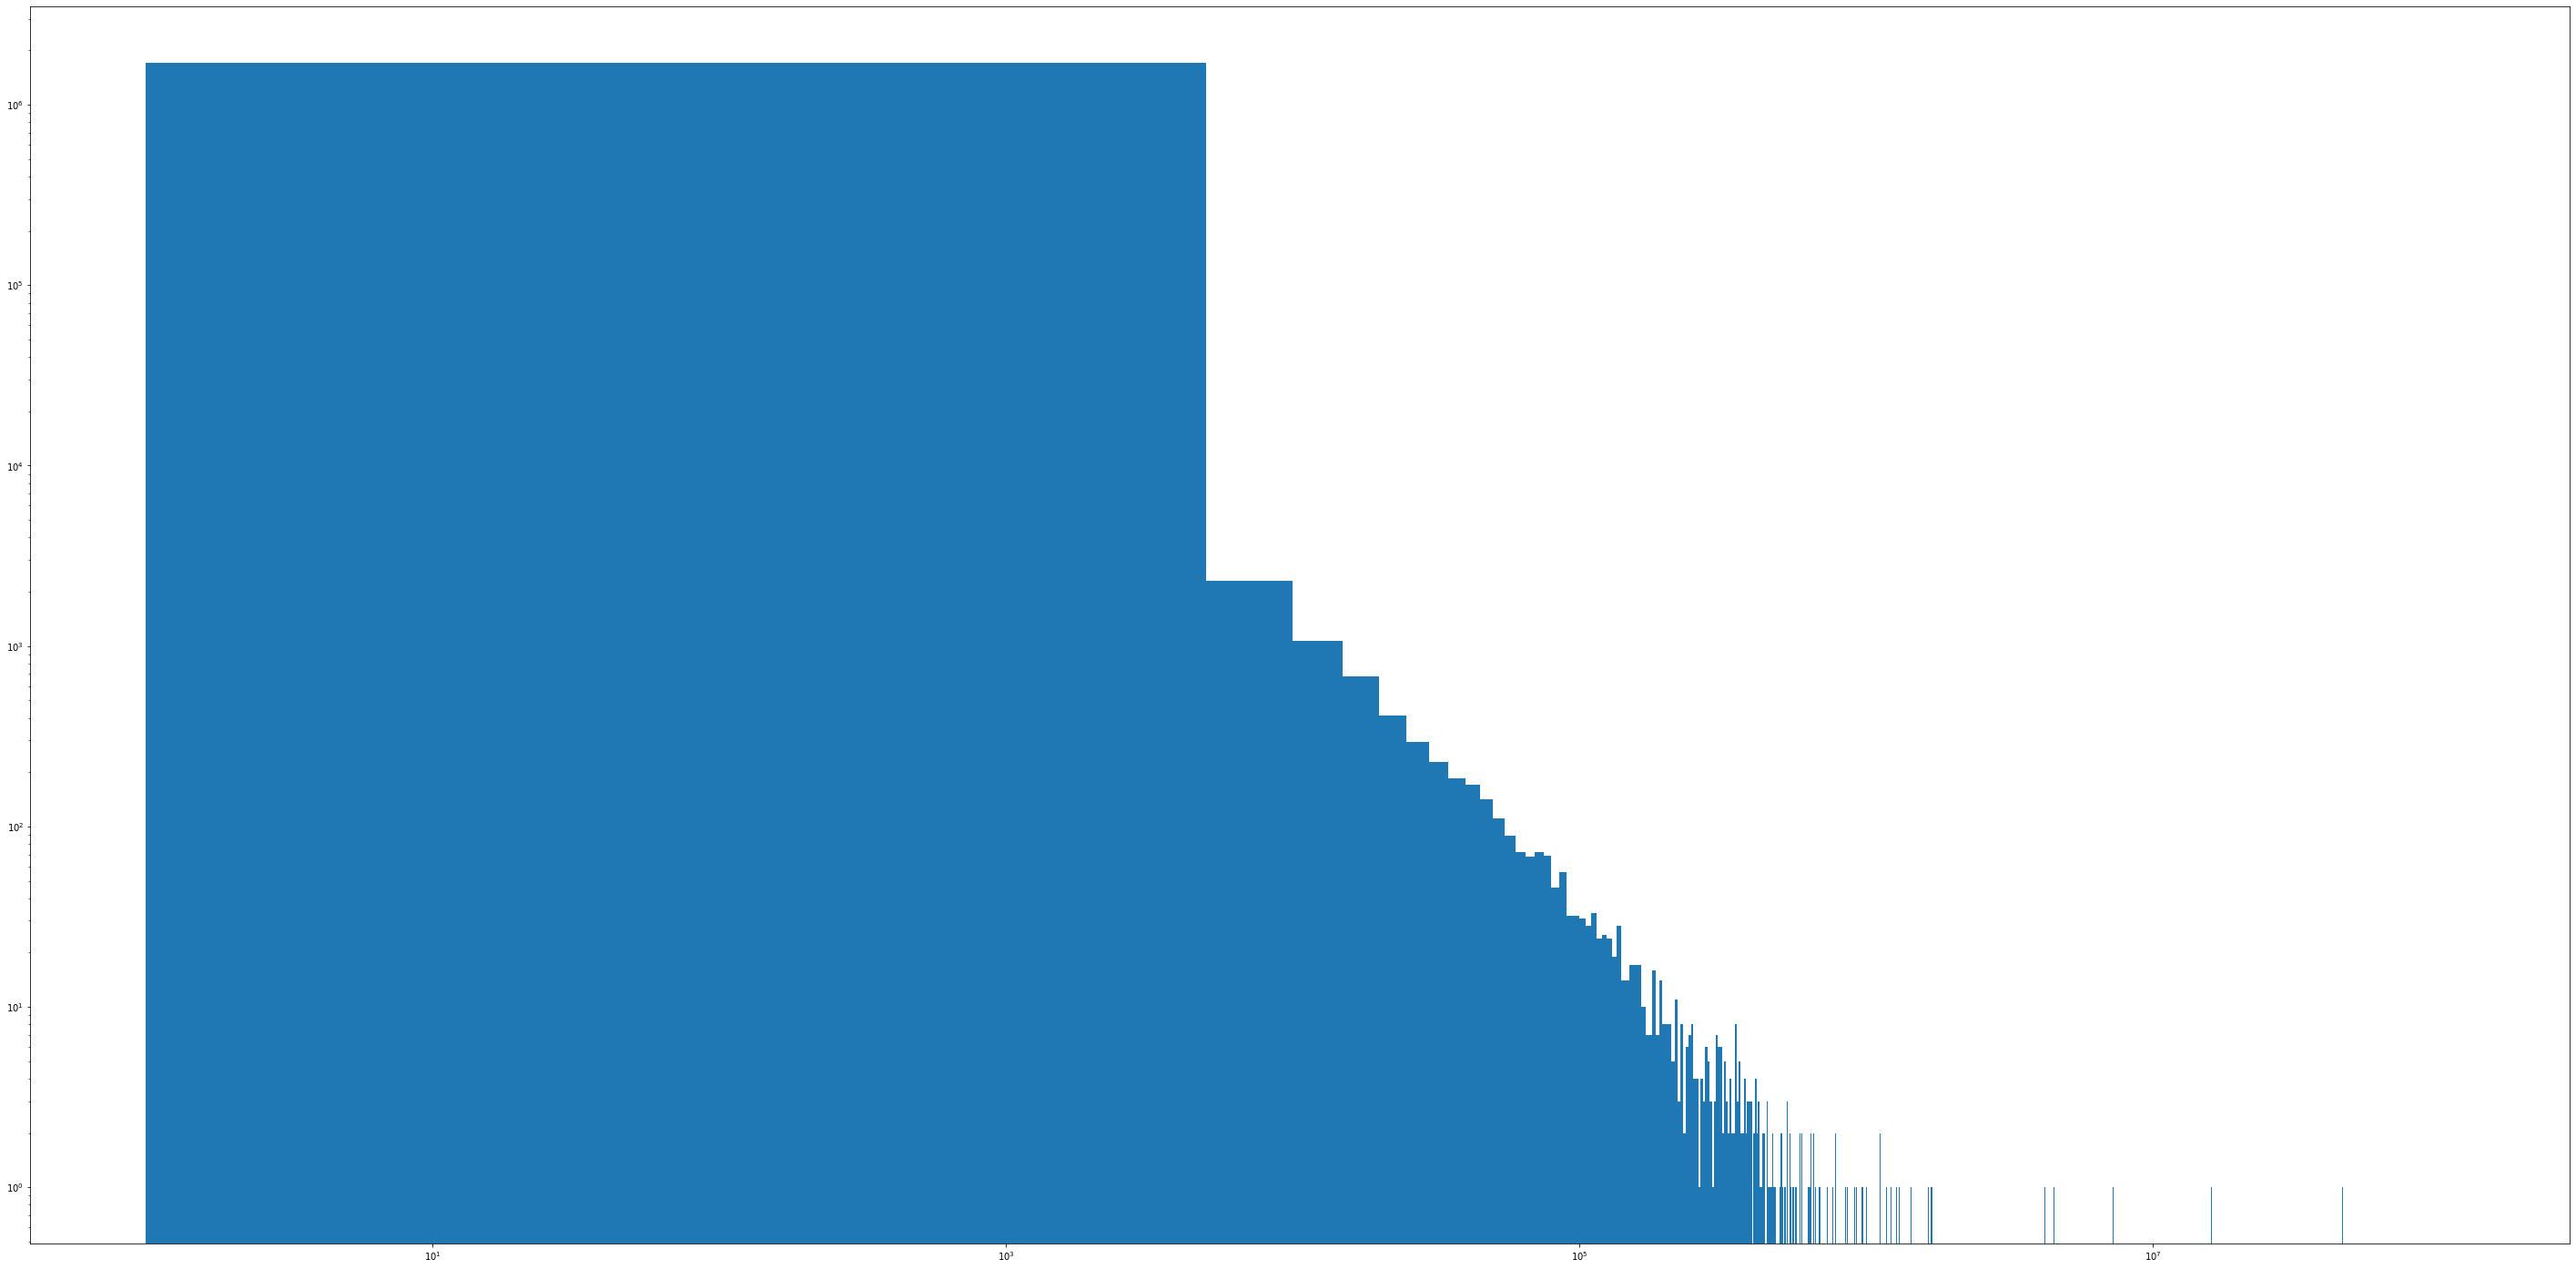

In [35]:
# x: #occurrence; y: freq
plt.figure(figsize=(50,25))
plt.xscale('log')
plt.yscale('log')
plt.hist(freqs, bins=np.arange(min(freqs), max(freqs)+1, 5000))

In [49]:
pred2cnt.most_common()[20000:21000]
# #occurrence >= 100 -> about 43000 words

[('_hindsight_n_1', 540),
 ('_childlike_a_1', 540),
 ('_mortgage_v_1', 540),
 ('u_symplectic_a', 540),
 ('u_infinitesimal_a', 540),
 ('u_bootleg_a', 540),
 ('u_nazism_n', 540),
 ('u_bundesliga_n', 540),
 ('u_tectonics_n', 540),
 ('_informed_a_1', 540),
 ('u_omnivore_n', 540),
 ('_poodle_n_1', 540),
 ('_mpg_n_1', 540),
 ('u_gristmill_n', 540),
 ('_indent_v_1', 540),
 ('u_codon_n', 540),
 ('u_augustinian_a', 539),
 ('_out+of+town_a_1', 539),
 ('u_première_n', 539),
 ('_seafarer_n_1', 539),
 ('_cut_v_in', 539),
 ('u_trident_n', 539),
 ('_bulwark_n_1', 539),
 ('u_homeostasis_n', 539),
 ('_vet_v_1', 539),
 ('_watchful_a_1', 539),
 ('u_école_n', 539),
 ('_trump_v_1', 539),
 ('_pull_v_in', 539),
 ('u_menstruation_n', 539),
 ('u_slat_n', 539),
 ('u_parallax_n', 539),
 ('_enthalpy_n_1', 539),
 ('u_sideshow_n', 539),
 ('u_hammerhead_n', 539),
 ('u_prototypical_a', 538),
 ('_deliberate_v_1', 538),
 ('u_nape_n', 538),
 ('_sceptical_a_1', 538),
 ('_strike_v_down', 538),
 ('u_heartbroken_a', 538),
 

In [126]:
print('''
#dmrs: {}
#distinct pred: {}
#dmrs nodes: {}
avg. #nodes/dmrs: {}
'''.format(
    dmrs_cnt,
    len(pred2cnt),
    sum(pred2cnt.values()),
    sum(pred2cnt.values())/dmrs_cnt
)
     )


#dmrs: 44628769
#distinct pred: 1937721
#dmrs nodes: 1025388300
avg. #nodes/dmrs: 22.975948541175313



## Categorize predicates according to pos

In [ ]:
pos2pred2cnt = defaultdict(Counter)
for pred, freq in pred2cnt.items():
    pred_lemma, pred_pos = util.get_lemma_pos(pred)
    pos2pred2cnt[pred_pos][pred] = freq

In [221]:
for pos in pos2pred2cnt:
    print (pos, sum(pos2pred2cnt[pos].values()))

S 567962528
q 70600659
c 22076898
p 68268655
v 75719554
a 53895271
x 8625365
n 139494287
nn 10189428
nns 2950167
jj 3213442
fw 807353
jjs 32211
vbn 376210
rb 376540
vbg 353416
vbd 129802
vbz 87579
vb 167286
jjr 39939
vbp 21062
 648


In [224]:
for pos in pos2pred2cnt:
    print (pos, len(pos2pred2cnt[pos]))

S 13627
q 687
c 470
p 1716
v 6217
a 4740
x 301
n 10338
nn 934071
nns 257246
jj 272407
fw 228651
jjs 2853
vbn 31000
rb 39505
vbg 44256
vbd 16097
vbz 22660
vb 35473
jjr 8401
vbp 7004
 1
  0


In [257]:
total = 0
for pos in pos2pred2cnt:
    for idx, (pred, freq) in enumerate(pos2pred2cnt[pos].most_common()):
        if freq < 1000:
            print (pos, "\t", idx)
            total += idx
            break
print (total)

S 	 96
q 	 34
c 	 39
p 	 276
v 	 3147
a 	 2502
x 	 189
n 	 6566
nn 	 1382
nns 	 308
jj 	 476
fw 	 25
jjs 	 1
vbn 	 49
rb 	 49
vbg 	 20
vbd 	 10
vbz 	 2
vb 	 6
jjr 	 2
vbp 	 0
 	 0
15179


In [ ]:
4200 + 10000

In [244]:
pos2pred2cnt['n'].most_common()[9300]

('_moll_n_1', 104)

In [215]:
pos2pred2cnt['c'].most_common()[:49]

[('_and_c_rel', 18248259),
 ('_or_c_rel', 1699385),
 ('_but_c_rel', 1146976),
 ('_as+well+as_c_rel', 178777),
 ('_and+then_c_rel', 87228),
 ('_not_c_rel', 68114),
 ('_then_c_rel', 65963),
 ('_versus_c_rel', 64115),
 ('_rather+than_c_rel', 53073),
 ('_and+also_c_rel', 50355),
 ('_etc_c_rel', 48824),
 ('_plus_c_rel', 43607),
 ('_yet_c_rel', 25384),
 ('_and+not_c_rel', 25287),
 ('_nor_c_rel', 25188),
 ('_but+not_c_rel', 24757),
 ('_but+also_c_rel', 22558),
 ('_and_c_mod', 22484),
 ('_to_c_from', 16345),
 ('_after_c_rel', 16246),
 ('_instead+of_c_rel', 15408),
 ('_formerly_c_rel', 13725),
 ('_and+so_c_rel', 13029),
 ('_and+thus_c_rel', 12131),
 ('_though_c_rel', 11445),
 ('_and_c_btwn', 10984),
 ('_except_c_rel', 9841),
 ('_or_c', 8451),
 ('_even_c_rel', 7818),
 ('_and+finally_c_rel', 7095),
 ('_but_c_mod', 4407),
 ('_if+not_c_rel', 4398),
 ('_together-with_c_rel', 4288),
 ('_so+on_c_rel', 4097),
 ('_minus_c_rel', 3560),
 ('_except+that_c_rel', 3305),
 ('_and+yet_c_rel', 1874),
 ('_et+al_c

In [216]:
pos2pred2cnt['x'].most_common()

[('_in+order+to_x', 1505868),
 ('_when_x_subord', 661686),
 ('_as_x_subord', 562717),
 ('_while_x', 436279),
 ('_only_x_deg', 388780),
 ('_if_x_then', 355976),
 ('_although_x', 292506),
 ('_very_x_deg', 287725),
 ('_because_x', 223192),
 ('_after_x_h', 182791),
 ('_though_x', 171457),
 ('_just_x_deg', 164333),
 ('_even_x_deg', 160184),
 ('_with_x_subord', 158606),
 ('_about_x_deg', 157827),
 ('_as_x_prd', 150670),
 ('_over_x_deg', 116026),
 ('_since_x_subord', 115212),
 ('_until_x_h', 108122),
 ('_before_x_h', 95095),
 ('_almost_x_deg', 94369),
 ('_especially_x_deg', 89216),
 ('_so_x', 83752),
 ('_much_x_deg', 83534),
 ('_well_x_deg', 69758),
 ('_at+least_x_deg', 69212),
 ('_for_x_cause', 63729),
 ('_particularly_x_deg', 59404),
 ('_approximately_x_deg', 58745),
 ('_of_x_subord', 52175),
 ('_to_x_subord', 50769),
 ('_now_x_deg', 49401),
 ('_once_x_subord', 48069),
 ('_relatively_x_deg', 47080),
 ('_so+that_x', 45321),
 ('_nearly_x_deg', 45271),
 ('_shortly_x_deg', 42493),
 ('_while_x_r

In [4]:
from collections import Counter
from functools import reduce
c = Counter({3: 4})
d = Counter()
c[1] = 2
d[1] = 3
d[2] = 4

reduce(lambda x, y: x + y, [c, d])

Counter({3: 4, 1: 5, 2: 4})

In [20]:
pos2pred2cnt['S'].most_common()

[('udef_q_rel', 113628863),
 ('proper_q_rel', 86675210),
 ('named_rel', 85585368),
 ('compound_rel', 41240412),
 ('compound_name_rel', 27121520),
 ('pronoun_q_rel', 20346400),
 ('pron_rel', 20169674),
 ('parg_d_rel', 19308942),
 ('unknown_rel', 13962736),
 ('card_rel', 13561638),
 ('def_explicit_q_rel', 12571196),
 ('poss_rel', 11292113),
 ('implicit_conj_rel', 9435785),
 ('yofc_rel', 9318567),
 ('appos_rel', 7299592),
 ('focus_d_rel', 6873472),
 ('loc_nonsp_rel', 6312336),
 ('nominalization_rel', 5926213),
 ('number_q_rel', 4162923),
 ('generic_entity_rel', 3546264),
 ('subord_rel', 2979501),
 ('parenthetical_rel', 2833716),
 ('mofy_rel', 2822472),
 ('def_implicit_q_rel', 2798673),
 ('ord_rel', 2797192),
 ('fw_seq_rel', 2644834),
 ('comp_rel', 2567783),
 ('part_of_rel', 1983676),
 ('dofm_rel', 1723003),
 ('named_n_rel', 1543857),
 ('neg_rel', 1464741),
 ('place_n_rel', 1307270),
 ('interval_rel', 1218077),
 ('interval_p_start_rel', 1207244),
 ('interval_p_end_rel', 1207244),
 ('superl

In [24]:
pred2cnt['_wartime_n_1']

6749

In [28]:
for p in pred2cnt:
    if "modal" in p:
        print (p)

_can_v_modal
_would_v_modal
_may_v_modal
_could_v_modal
_must_v_modal
_should_v_modal
_have_v_qmodal
_might_v_modal
_going+to_v_qmodal
_used+to_v_qmodal
_need_v_qmodal
_ought_v_qmodal
_had+better_v_qmodal
u_modal_a
u_modality_n
_dare_v_qmodal
_gotta_v_modal
u_modal_n
u_intermodal_a
u_multimodal_a
u_intermodal_n
u_bimodal_a
u_unimodal_a
u_submodalities_n
u_modalism_n
_had+best_v_qmodal
u_multimodal_n
u_polymodal_a
u_bimodal_n
u_modally_a
u_multimodality_n
u_modality_a
u_intermodality_n
u_bimodality_n
u_modal_v
u_unimodal_n
u_modal-_n
u_submodality_n
u_amodal_a
u_polymodal_n
u_polymodality_n
u_modalists_n
u_crossmodal_a
u_modality-_n
u_modalist_n
u_intramodal_a
u_modalistic_a
u_modally-_n
u_co-modality_n
u_bimodal-_n
u_modalites_n
u_modalx_n
u_intermodalism_n
u_multimodality_a
u_modalagency_n
u_modale_n
u_transmodal_a
u_modalitiesd_n
u_modalising_v
u_f.showmodal_n
u_amodal_n
u_intermodals_n
u_modaline_n
u_modalys_n
u_musical_mode|modal_a
u_co-modal_n
u_modality._n
u_bimodally_a
u_mulitmo